Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below:

In [10]:
NAME = "Maria Baba"
STUDENT_ID = "14201089"

---

# Social Network Analysis Assignment

This assignment aims to familiarize you with the concepts and practical applications of social network analysis. You will be working with Python and the NetworkX library to create, analyze, and understand various types of networks.


---

## Task 1: Create a Small Network

**Objective:** Generate a network with 10 nodes and a density of 0.2 using NetworkX.

**Instructions:**
1. Calculate the number of edges `m` needed to achieve a density `d = 0.2` for a network of `n = 10` nodes using the formula:

$$d = \frac{2m}{n(n-1)}$$


2. Create a graph in NetworkX in variable `G` and add the calculated number of edges.
3. Ensure the network consists of one large component.

In [11]:
import networkx as nx
import random
import matplotlib.pyplot as plt

9
10


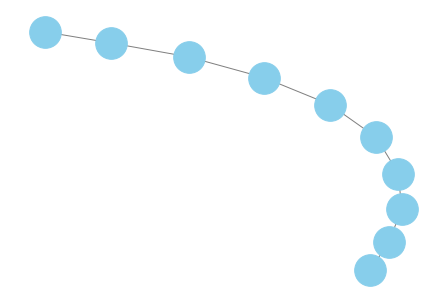

In [12]:

# YOUR CODE HERE
#raise NotImplementedError()

G = nx.Graph()
#Add nodes
number_nodes=10
for x in range(0, number_nodes):
    G.add_node(x)

#Calculate number of edges from formula
m=(0.2*(10*(10-1)))/2
number_edges=int(m)

edges = []
for x in range(number_edges):
    edge = (x, (x + 1) % number_nodes)
    edges.append(edge)

G.add_edges_from(edges)


#Largest component
large_component= max(nx.connected_components(G), key=len)
G=G.subgraph(large_component)

#Check number of edges and nodes
print(number_edges)
num_nodes = G.number_of_nodes()
print(num_nodes)


nx.draw(G, node_color='skyblue', node_size=1000, font_size=10, edge_color='gray')

# Show the plot
plt.show()

In [13]:
assert type(G) == nx.Graph

## Task 2: Create a Non-Small-World Network

**Objective:** Write a script to generate a network that is not a small world. The network should have 500 nodes and at least 1000 edges, with an average shortest path length of at least 50.

**Instructions:**
1. Create a function `create_large_world_network` that generates a network according to the specified criteria.
2. Ensure that the network is not a small world by design.

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def create_large_world_network(number_nodes=500, number_edges=1000, shortest_path=50):
    # YOUR CODE HERE
    G = nx.Graph()
    
#Add edges 
    for x in range (number_nodes):
        G.add_node(x)
        G.add_edge(x, (x + 1) % number_nodes) 
        G.add_edge(x, (x + 2) % number_nodes)

#Add edges while the shortest average path length is less than 50.
    while nx.average_shortest_path_length(G) < shortest_path:
        edges= [(x,y)for x in range (number_nodes) for y in range (x+1, number_nodes)]

#Add edges while the number of edges in the network is less than 1000.
    while G.number_of_edges() < number_edges:
        edges= [(x,y)for x in range (number_nodes) for y in range (x+1, number_nodes)]

    return G

#Create network
G = create_large_world_network()

print(f"Nodes: {len(G.nodes())}; edges: {len(G.edges())}; average shortest path: {nx.average_shortest_path_length(G)}")

Nodes: 500; edges: 1000; average shortest path: 62.875751503006015


## Task 3: Analyze the Florentine Families Network

**Objective:** Analyze the Florentine families network to find the most central node in terms of PageRank, betweenness, degree, and eigenvector centrality.

**Instructions:**
1. Load the Florentine families dataset (Padget & Ansell, 1993).
2. Calculate and return the most central node for each centrality measure (PageRank, Betweenness, Degree, and Eigenvector centrality)

Node with highest PageRank centrality: Tornabuoni
Node with highest Betweenness centrality: Tornabuoni
Node with highest Degree centrality: Tornabuoni
Node with highest Eigenvector centrality: Tornabuoni


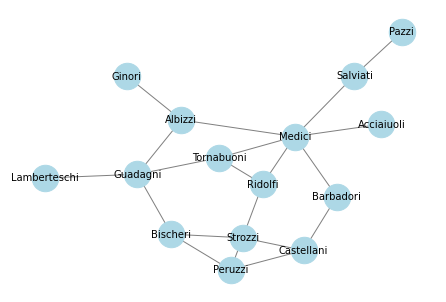

In [15]:
import matplotlib.pyplot as plt


def find_most_central_nodes(G):
    # YOUR CODE HERE
    top_pagerank=max(nx.pagerank(G))
    top_betweenness=max(nx.betweenness_centrality(G))
    top_degree=max(nx.degree_centrality(G))
    top_eigenvector=max(nx.eigenvector_centrality(G))
    return top_pagerank, top_betweenness, top_degree, top_eigenvector



G = nx.florentine_families_graph()

top_pagerank, top_betweenness, top_degree, top_eigenvector = find_most_central_nodes(G)

print(f"Node with highest PageRank centrality: {top_pagerank}")
print(f"Node with highest Betweenness centrality: {top_betweenness}")
print(f"Node with highest Degree centrality: {top_degree}")
print(f"Node with highest Eigenvector centrality: {top_eigenvector}")

# Visualize the network
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', font_size=10, node_size=700)
plt.show()

---

## Task 4: Generate a Graph with Clustered Communities

**Objective:** Write a function to generate a graph with N clusters, each containing M nodes. The nodes in each cluster should be randomly connected with density D - with connections going between randomly selected nodes. The clusters should be linked with each other, to produce a single component, with as few connections as possible.

**Instructions:**
1. Create a function `create_clustered_graph` that generates a graph according to the description above.
2. Analyze the graph using Louvain community detection to examine the resulting modularity.

Now generate two networks with your algorithm. One with 3 clusters, and one with 10 clusters. The other parameters should be same as above.

Run Louvain community detection on both. Which of the networks has a higher modularity? What do you make of this?

The identified modularity is 0.7955682445850849.


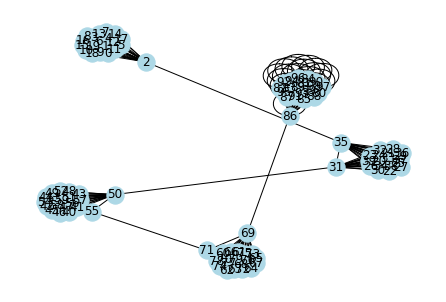

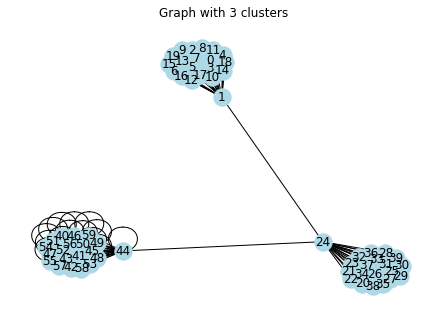

The identified modularity for a graph with 3 clusters is 0.6625459390978816.


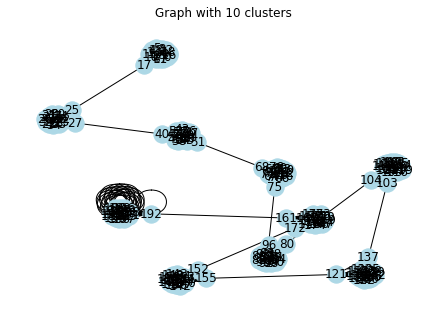

The identified modularity for a graph with 10 clusters is 0.895241815395208.


In [16]:
from community import community_louvain
import networkx as nx
import random
import matplotlib.pyplot as plt


def create_clustered_graph(N, M, D):
    G = nx.Graph()

    # N= number of clusters
    # M=nodes per cluster
    # D=intradensity

# Create clustered nodes and connect graph
    for cluster in range(N):
       node_clustered =list(range(cluster * M, (cluster + 1)*M))
       G.add_nodes_from(node_clustered)
       G.add_edges_from(nx.complete_graph(node_clustered).edges())

#Select random nodes from the range and add edges between them
    for i in range(N - 1):
        node_x = list(range(i * M, (i + 1) * M))
        node_y = list(range((i + 1) * M, (i + 2) * M))

        random_x = random.choice(node_x)
        random_y = random.choice(node_y)

        G.add_edge(random_x, random_y)

#Add edges between random nodes while keeping a small intradensity
    for node_x in node_clustered:
            for node_y in node_clustered:
                if random.random() < D:
                    G.add_edge(node_x, node_y)
    return G

#Use Lovain function to get the partition and modularity
def identify_louvain_modularity(G):
    part = community_louvain.best_partition(G)
    modul = community_louvain.modularity(part, G)
    return modul

num_clusters = 5
nodes_per_cluster = 20
intra_density = 1
G = create_clustered_graph(num_clusters, nodes_per_cluster, intra_density)

modularity = identify_louvain_modularity(G)
print(f"The identified modularity is {modularity}.")

# Draw the graph from the function
nx.draw(G, with_labels=True, node_color='lightblue')


# Create and draw network with 3 clusters
num_clusters_A = 3
A = create_clustered_graph(num_clusters_A, nodes_per_cluster, intra_density)
plt.figure()
nx.draw(A, with_labels=True, node_color='lightblue')
plt.title('Graph with 3 clusters')
plt.show()
# Print modularity for network with 3 clusters
modularity = identify_louvain_modularity(A)
print(f"The identified modularity for a graph with 3 clusters is {modularity}.")

# Create and draw network with 10 clusters
num_clusters_B = 10
B = create_clustered_graph(num_clusters_B, nodes_per_cluster, intra_density)
plt.figure()
nx.draw(B, with_labels=True, node_color='lightblue')
plt.title('Graph with 10 clusters')
plt.show()
# Print modularity for network with 10 clusters.
modularity = identify_louvain_modularity(B)
print(f"The identified modularity for a graph with 10 clusters is {modularity}.")



The network with the highest modularity is the one with 10 clusters, meaning that having more clusters creates a network that is more strongly connected in therms of the groups formed by the nodes within that network.

---

## Task 5: Twitter Retweet Network Analysis

**Objective:** Create a network from a Twitter dataset and analyze it to find the most central politicians and calculate the weighted homophily based on party.

**Instructions:**
1. Load the Twitter dataset, sweden_2018.df.pickle, and create a network where nodes represent politicians and edges represent retweets.
2. Calculate the weighted homophily of the network. The weighted homophily is here the tendency for individuals of the same party to form connections with one another. 
3. Identify the most central politicians using different centrality measures.

,from_user_name,party,text,created_at
3896498,AdamMarttinen,SweDem,”Äntligen svänger Moderaterna om stärkt gränss...,2017-07-18 14:00:19
3896499,AdamMarttinen,SweDem,RT @PaulaBieler: Och här klargör @AdamMarttine...,2017-07-25 19:43:21
3896500,AdamMarttinen,SweDem,Regeringen presenterar nu delar av den inrikti...,2017-08-20 09:38:23
3896501,AdamMarttinen,SweDem,Känns skönt att regeringen nu gör det vi efter...,2017-08-30 10:13:35
3896502,AdamMarttinen,SweDem,SD har av andra skäl krävt Eliassons avgång. A...,2017-09-05 22:44:35


,from_user_name,party,text,created_at,to_username,message
3896499,AdamMarttinen,SweDem,RT @PaulaBieler: Och här klargör @AdamMarttine...,2017-07-25 19:43:21,PaulaBieler,Och här klargör @AdamMarttinen varför det inte...
3896507,AdamMarttinen,SweDem,RT @sdriks: Det utländska tiggeriet måste upph...,2017-09-21 15:24:47,sdriks,Det utländska tiggeriet måste upphöra! @AdamMa...
3896521,AdamMarttinen,SweDem,RT @ABDebatt: DEBATT. Värna offren - skärp str...,2017-10-23 12:57:34,ABDebatt,"DEBATT. Värna offren - skärp straffen, skriver..."
3896527,AdamMarttinen,SweDem,RT @Peppe_Larsson: Poliser slutat\n2014: 678\n...,2017-12-06 10:46:22,Peppe_Larsson,Poliser slutat
3896537,AdamMarttinen,SweDem,RT @dagensindustri: Flyktinginvandringen komme...,2018-01-03 20:32:42,dagensindustri,Flyktinginvandringen kommer under lång tid att...


C:\Users\maria\AppData\Local\Temp\ipykernel_9460\4286538587.py:44: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sample = random.sample(all_politicians, min(size, len(all_politicians)))


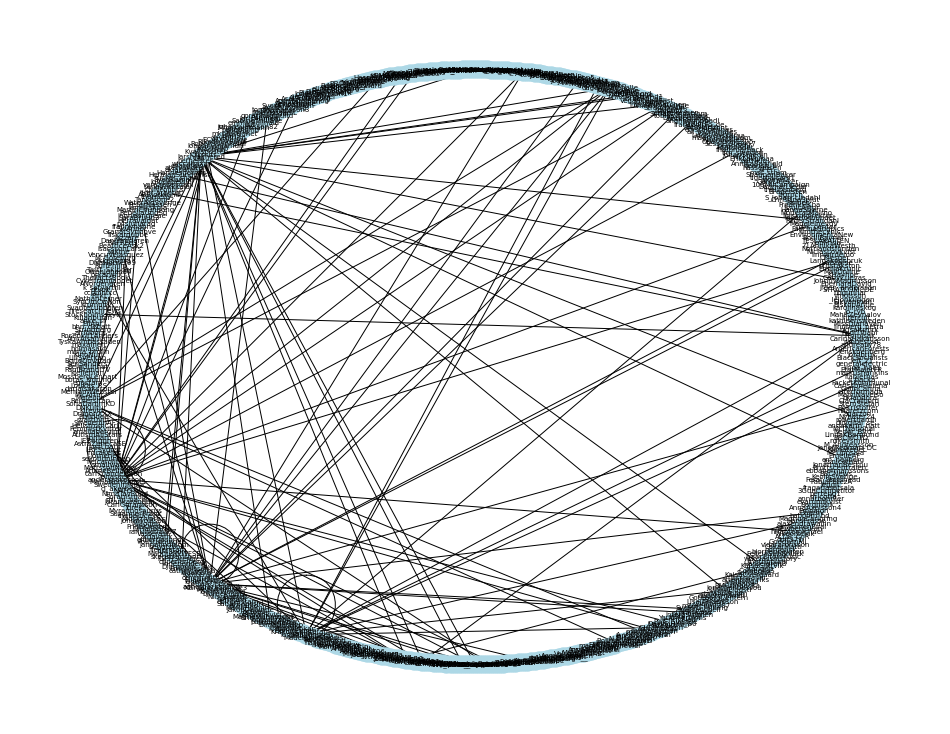

In [17]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import random
import networkx as nx

df = pd.read_pickle('sweden_2018.df.pickle')
display(df.head())

def extract_retweeted_username(tweet):

    pattern = r'RT @(\w+):'
    match = re.search(pattern, tweet)
    if match:
        return match.group(1)  # Returns the captured username
    return None  # Returns None if no match is found

#1. Extract retweets
def extract_retweet(value):

    pattern = r'RT @(\w+): (.+)'
    match = re.search(pattern, value)
    if match:
        return match.group(2)  
        
#2. Include only retweets of politicians that have also sent at least one message.
df['to_username'] = df['text'].apply(extract_retweeted_username)
df['message'] = df['text'].apply(extract_retweet) 
cleaned = df.dropna()
display (cleaned.head())

#3. Count the number of messages from each user to each user
groups=cleaned.groupby(['from_user_name', 'to_username']).size().reset_index()
merged_df = pd.merge(cleaned, groups, on=['from_user_name', 'to_username'], how='left')
merged_df.rename(columns={0 : 'weight'}, inplace=True)

#4. Create a weighted network from the resulting dataframe. The nodes should have include the party name as an attribute.
from_politicians=merged_df['from_user_name']
to_politicians=merged_df['to_username']
all_politicians=set(from_politicians) | set(to_politicians)

#I used a sample of the data, otherwise tit is hard to visualize the network clearly.
size=600
sample = random.sample(all_politicians, min(size, len(all_politicians)))

# Create a graph from sample
G = nx.Graph()

#Add nodes from sample
for x in sample:
    G.add_node(x)

#Add attributes to nodes based on party
party_politicians = zip(merged_df['from_user_name'], merged_df['party'])
nx.set_node_attributes(G, party_politicians, 'party')

#Add edges and their weights
for fo, to, we in zip(merged_df['from_user_name'],merged_df['to_username'],merged_df['weight']):
    if fo in sample and to in sample:
        G.add_edge(fo,to,weight=we)


# Plot the graph
plt.figure(figsize=(13, 10))
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, font_size=7, node_color='lightblue')


In [18]:
# Since a sample was used for visual representation, this code creates another graph,
# Z, in order to asses homophily and most central nodes for the full dataset.
import pandas as pd
import re
import matplotlib.pyplot as plt
import random
import networkx as nx

Z = nx.Graph()

for x in all_politicians:
    Z.add_node(x)

party_politicians = zip(merged_df['from_user_name'], merged_df['party'])
nx.set_node_attributes(Z, party_politicians, 'party')

for f, t, w in zip(merged_df['from_user_name'], merged_df['to_username'], merged_df['weight']):
    Z.add_edge(f,t,weight=w)


#Calculate homophily 

def calculate_weighted_homophily(graph, attribute):

#Get all weights from edges and sum them
    all_weights= nx.get_edge_attributes(graph, 'weight').values()
    total_weights=sum(all_weights)

    same = []
    for edge in graph.edges(data=True):
        node1, node2, data = edge

#If attributes are in the selected nodes, and if attributes are the same, add them to the list of similar weights.
        if attribute in graph.nodes[node1] and attribute in graph.nodes[node2]: 
            attribute_n1= graph.nodes[node1][attribute]
            attribute_n2= graph.nodes[node2][attribute]
            if attribute_n1== attribute_n2:
                same.append(data['weight'])


    total_s= sum(same)
    
#Get ratio by dividing total of similar weights by total of all weights
    homophily_ratio=total_s /total_weights
    return homophily_ratio
    
homophily = calculate_weighted_homophily(Z, 'party')    
print(f"The resulting homophily is {homophily}.")

#Find most central nodes
def find_most_central_nodes(Z):

    top_pagerank=max(nx.pagerank(Z))
    top_betweenness=max(nx.betweenness_centrality(Z))
    top_degree=max(nx.degree_centrality(Z))
    top_eigenvector=max(nx.eigenvector_centrality(Z))
    return top_pagerank, top_betweenness, top_degree, top_eigenvector

top_pagerank, top_betweenness, top_degree, top_eigenvector = find_most_central_nodes(Z)

print("Node with highest PageRank centrality:", top_pagerank)
print("Node with highest Betweenness centrality:", top_betweenness)
print("Node with highest Degree centrality:", top_degree)
print("Node with highest Eigenvector centrality:", top_eigenvector)

The resulting homophily is 1.0.
Node with highest PageRank centrality: zwajan
Node with highest Betweenness centrality: zwajan
Node with highest Degree centrality: zwajan
Node with highest Eigenvector centrality: zwajan
